<a href="https://colab.research.google.com/github/NguyenHoang127/AI_Exercise_2/blob/main/Exercise_3_Fuzzy_%C4%90o%C3%A0n_Nguy%E1%BB%85n_Ho%C3%A0ng_20146195.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=76603b0a62595930defe4ad0b6d9e29912555001ace408db59d347df94ef56be
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


Cong suat can thiet la:  680.8823529411765


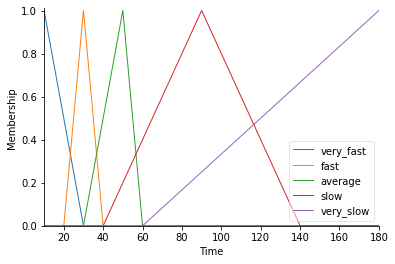

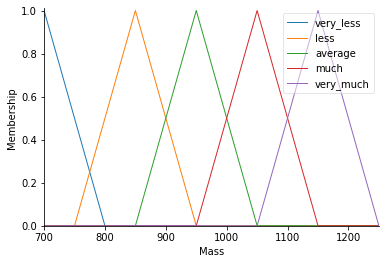

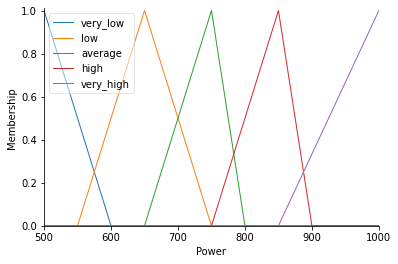

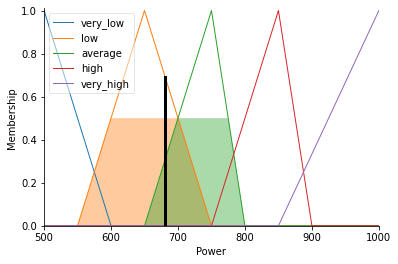

In [ ]:
#1. Bài Toán Nồi Cơm Điện
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl 
import matplotlib.pyplot as plt

#Khai báo đầu vào và đầu ra
Time = ctrl.Antecedent(np.arange(10,190,10),'Time')         #Input
Mass = ctrl.Antecedent(np.arange(700,1300,50),'Mass')   #Input
Power = ctrl.Consequent(np.arange(500,1050,50),'Power')          #Output

#Đơn vị:phút
Time['very_fast'] = fuzz.trimf(Time.universe,[10,10,30])
Time['fast'] = fuzz.trimf(Time.universe,[20,30,40])
Time['average'] = fuzz.trimf(Time.universe,[30,50,60])
Time['slow'] = fuzz.trimf(Time.universe,[40,90,140])
Time['very_slow'] = fuzz.trimf(Time.universe,[60,180,180])

#Đơn vị: gram
Mass['very_less'] = fuzz.trimf(Mass.universe,[700,700,800])
Mass['less'] = fuzz.trimf(Mass.universe,[750,850,950])
Mass['average'] = fuzz.trimf(Mass.universe,[850,950,1050])
Mass['much'] = fuzz.trimf(Mass.universe,[950,1050,1150])
Mass['very_much'] = fuzz.trimf(Mass.universe,[1050,1150,1250])

#Đơn vị: W
Power['very_low'] = fuzz.trimf(Power.universe,[500,500,600])
Power['low'] = fuzz.trimf(Power.universe,[550,650,750])
Power['average'] = fuzz.trimf(Power.universe,[650,750,800])
Power['high'] = fuzz.trimf(Power.universe,[750,850,900])
Power['very_high'] = fuzz.trimf(Power.universe,[850,1000,1000])


Time.view()
Mass.view()
Power.view()

#--------------------------------------------------------------------------------------------------------------------------------------
#Traning
value1 = ctrl.Rule(Time['very_fast'] & Mass['very_less'],Power['very_high'])
value2 = ctrl.Rule(Time['very_fast'] & Mass['less'],Power['very_high'])
value3 = ctrl.Rule(Time['very_fast'] & Mass['average'],Power['very_high'])
value4 = ctrl.Rule(Time['very_fast'] & Mass['much'],Power['very_high'])
value5 = ctrl.Rule(Time['very_fast'] & Mass['very_much'],Power['very_high'])


value6 = ctrl.Rule(Time['fast'] & Mass['very_less'],Power['high'])
value7 = ctrl.Rule(Time['fast'] & Mass['less'],Power['high'])
value8 = ctrl.Rule(Time['fast'] & Mass['average'],Power['very_high'])
value9 = ctrl.Rule(Time['fast'] & Mass['much'],Power['very_high'])
value10 = ctrl.Rule(Time['fast'] & Mass['very_much'],Power['very_high'])

value11 = ctrl.Rule(Time['average'] & Mass['very_less'],Power['average'])
value12 = ctrl.Rule(Time['average'] & Mass['less'],Power['high'])
value13 = ctrl.Rule(Time['average'] & Mass['average'],Power['high'])
value14 = ctrl.Rule(Time['average'] & Mass['much'],Power['high'])
value15 = ctrl.Rule(Time['average'] & Mass['very_much'],Power['high'])

value16 = ctrl.Rule(Time['slow'] & Mass['very_less'],Power['low'])
value17 = ctrl.Rule(Time['slow'] & Mass['less'],Power['average'])
value18 = ctrl.Rule(Time['slow'] & Mass['average'],Power['average'])
value19 = ctrl.Rule(Time['slow'] & Mass['much'],Power['average'])
value20 = ctrl.Rule(Time['slow'] & Mass['very_much'],Power['average'])


value21 = ctrl.Rule(Time['very_slow'] & Mass['very_less'],Power['very_low'])
value22 = ctrl.Rule(Time['very_slow'] & Mass['less'],Power['low'])
value23 = ctrl.Rule(Time['very_slow'] & Mass['average'],Power['low'])
value24 = ctrl.Rule(Time['very_slow'] & Mass['much'],Power['average'])
value25 = ctrl.Rule(Time['very_slow'] & Mass['very_much'],Power['average'])

Powering_ctrl = ctrl.ControlSystem([value1,value2,value3,value4,value5,value6,value7,value8,value9,value10,value11,value12,value13,value14,value15,value16,value17,value18,value19,value20,value21,value23,value24,value25])
Powering = ctrl.ControlSystemSimulation(Powering_ctrl)

Powering.input['Time'] = 129
Powering.input['Mass'] = 1000
Powering.compute()

print("Cong suat can thiet la: ",Powering.output['Power'])
Power.view(sim=Powering)

3.3364180118836924


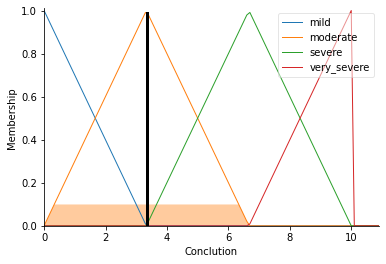

In [11]:
#2. Fuzzy Rule Base for Malaria

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl 
import matplotlib.pyplot as plt


#Khai báo đầu vào và đầu ra
#Đánh giá mức độ các triệu chứng trên thang điểm từ 1-10
Fever = ctrl.Antecedent(np.arange(0,11,0.1),'Fever')         #Input
Headache = ctrl.Antecedent(np.arange(0,11,0.1),'Headache')         #Input
Nausea = ctrl.Antecedent(np.arange(0,11,0.1),'Nausea')         #Input
Vomiting = ctrl.Antecedent(np.arange(0,11,0.1),'Vomiting')         #Input
Jaundice = ctrl.Antecedent(np.arange(0,11,0.1),'Jaundice')         #Input
Enlarge_Liver = ctrl.Antecedent(np.arange(0,11,0.1),'Enlarge_Liver')         #Input
Joint_Pain = ctrl.Antecedent(np.arange(0,11,0.1),'Joint_Pain')         #Input
Body_Weakness = ctrl.Antecedent(np.arange(0,11,0.1),'Body_Weakness')         #Input
Dizziness = ctrl.Antecedent(np.arange(0,11,0.1),'Dizziness')         #Input
Loss_of_Appetite = ctrl.Antecedent(np.arange(0,11,0.1),'Loss_of_Appetite')         #Input
MP = ctrl.Antecedent(np.arange(0,11,0.1),'MP')         #Input

Conclution = ctrl.Consequent(np.arange(0,11,0.1),'Conclution')          #Output

# Biểu đồ các triệu chứng
Fever['mild'] = fuzz.trimf(Fever.universe,[0,0,3.33])
Fever['moderate'] = fuzz.trimf(Fever.universe,[0,3.33,6.67])
Fever['severe'] = fuzz.trimf(Fever.universe,[3.33,6.67,10])
Fever['very_severe'] = fuzz.trimf(Fever.universe,[6.67,10,10])

Headache['mild'] = fuzz.trimf(Headache.universe,[0,0,3.33])
Headache['moderate'] = fuzz.trimf(Headache.universe,[0,3.33,6.67])
Headache['severe'] = fuzz.trimf(Headache.universe,[3.33,6.67,10])
Headache['very_severe'] = fuzz.trimf(Headache.universe,[6.67,10,10])

Nausea['mild'] = fuzz.trimf(Nausea.universe,[0,0,3.33])
Nausea['moderate'] = fuzz.trimf(Nausea.universe,[0,3.33,6.67])
Nausea['severe'] = fuzz.trimf(Nausea.universe,[3.33,6.67,10])
Nausea['very_severe'] = fuzz.trimf(Nausea.universe,[6.67,10,10])

Vomiting['mild'] = fuzz.trimf(Vomiting.universe,[0,0,3.33])
Vomiting['moderate'] = fuzz.trimf(Vomiting.universe,[0,3.33,6.67])
Vomiting['severe'] = fuzz.trimf(Vomiting.universe,[3.33,6.67,10])
Vomiting['very_severe'] = fuzz.trimf(Vomiting.universe,[6.67,10,10])

Jaundice['mild'] = fuzz.trimf(Jaundice.universe,[0,0,3.33])
Jaundice['moderate'] = fuzz.trimf(Jaundice.universe,[0,3.33,6.67])
Jaundice['severe'] = fuzz.trimf(Jaundice.universe,[3.33,6.67,10])
Jaundice['very_severe'] = fuzz.trimf(Jaundice.universe,[6.67,10,10])

Enlarge_Liver['mild'] = fuzz.trimf(Enlarge_Liver.universe,[0,0,3.33])
Enlarge_Liver['moderate'] = fuzz.trimf(Enlarge_Liver.universe,[0,3.33,6.67])
Enlarge_Liver['severe'] = fuzz.trimf(Enlarge_Liver.universe,[3.33,6.67,10])
Enlarge_Liver['very_severe'] = fuzz.trimf(Enlarge_Liver.universe,[6.67,10,10])

Joint_Pain['mild'] = fuzz.trimf(Joint_Pain.universe,[0,0,3.33])
Joint_Pain['moderate'] = fuzz.trimf(Joint_Pain.universe,[0,3.33,6.67])
Joint_Pain['severe'] = fuzz.trimf(Joint_Pain.universe,[3.33,6.67,10])
Joint_Pain['very_severe'] = fuzz.trimf(Joint_Pain.universe,[6.67,10,10])

Body_Weakness['mild'] = fuzz.trimf(Body_Weakness.universe,[0,0,3.33])
Body_Weakness['moderate'] = fuzz.trimf(Body_Weakness.universe,[0,3.33,6.67])
Body_Weakness['severe'] = fuzz.trimf(Body_Weakness.universe,[3.33,6.67,10])
Body_Weakness['very_severe'] = fuzz.trimf(Body_Weakness.universe,[6.67,10,10])

Dizziness['mild'] = fuzz.trimf(Dizziness.universe,[0,0,3.33])
Dizziness['moderate'] = fuzz.trimf(Dizziness.universe,[0,3.33,6.67])
Dizziness['severe'] = fuzz.trimf(Dizziness.universe,[3.33,6.67,10])
Dizziness['very_severe'] = fuzz.trimf(Dizziness.universe,[6.67,10,10])

Loss_of_Appetite['mild'] = fuzz.trimf(Loss_of_Appetite.universe,[0,0,3.33])
Loss_of_Appetite['moderate'] = fuzz.trimf(Loss_of_Appetite.universe,[0,3.33,6.67])
Loss_of_Appetite['severe'] = fuzz.trimf(Loss_of_Appetite.universe,[3.33,6.67,10])
Loss_of_Appetite['very_severe'] = fuzz.trimf(Loss_of_Appetite.universe,[6.67,10,10])

MP['mild'] = fuzz.trimf(MP.universe,[0,0,3.33])
MP['moderate'] = fuzz.trimf(MP.universe,[0,3.33,6.67])
MP['severe'] = fuzz.trimf(MP.universe,[3.33,6.67,10])
MP['very_severe'] = fuzz.trimf(MP.universe,[6.67,10,10])

Conclution['mild'] = fuzz.trimf(Conclution.universe,[0,0,3.33])
Conclution['moderate'] = fuzz.trimf(Conclution.universe,[0,3.33,6.67])
Conclution['severe'] = fuzz.trimf(Conclution.universe,[3.33,6.67,10])
Conclution['very_severe'] = fuzz.trimf(Conclution.universe,[6.67,10,10])

#Rule

#--------------------------------------------------------------------------------------------------------------------------------------
#Traning
value1 = ctrl.Rule(Fever['mild'] & Headache['mild'] & Nausea['mild'] & Vomiting['mild'] & Jaundice['mild'] & Enlarge_Liver['mild'] & Joint_Pain['mild'] & Body_Weakness['mild'] & Dizziness['severe'] & Loss_of_Appetite['mild'] & MP['mild'],Conclution['mild'])
value2 = ctrl.Rule(Fever['moderate'] & Headache['mild'] & Nausea['mild'] & Vomiting['mild'] & Jaundice['mild'] & Enlarge_Liver['mild'] & Joint_Pain['moderate'] & Body_Weakness['moderate'] & Dizziness['severe'] & Loss_of_Appetite['severe'] & MP['moderate'],Conclution['moderate'])
value3 = ctrl.Rule(Fever['severe'] & Headache['moderate'] & Nausea['mild'] & Vomiting['mild'] & Jaundice['mild'] & Enlarge_Liver['mild'] & Joint_Pain['mild'] & Body_Weakness['severe'] & Dizziness['severe'] & Loss_of_Appetite['severe'] & MP['moderate'],Conclution['severe'])
value4 = ctrl.Rule(Fever['very_severe'] & Headache['mild'] & Nausea['mild'] & Vomiting['mild'] & Jaundice['mild'] & Enlarge_Liver['mild'] & Joint_Pain['severe'] & Body_Weakness['severe'] & Dizziness['mild'] & Loss_of_Appetite['mild'] & MP['severe'],Conclution['very_severe'])
value5 = ctrl.Rule(Fever['moderate'] & Headache['mild'] & Nausea['mild'] & Vomiting['moderate'] & Jaundice['mild'] & Enlarge_Liver['mild'] & Joint_Pain['moderate'] & Body_Weakness['moderate'] & Dizziness['moderate'] & Loss_of_Appetite['severe'] & MP['moderate'],Conclution['moderate'])


value6 = ctrl.Rule(Fever['mild'] & Headache['moderate'] & Nausea['moderate'] & Vomiting['mild'] & Jaundice['mild'] & Enlarge_Liver['mild'] & Joint_Pain['mild'] & Body_Weakness['mild'] & Dizziness['moderate'] & Loss_of_Appetite['mild'] & MP['mild'],Conclution['mild'])
value7 = ctrl.Rule(Fever['mild'] & Headache['mild'] & Nausea['moderate'] & Vomiting['moderate'] & Jaundice['mild'] & Enlarge_Liver['mild'] & Joint_Pain['severe'] & Body_Weakness['severe'] & Dizziness['moderate'] & Loss_of_Appetite['moderate'] & MP['moderate'],Conclution['severe'])
value8 = ctrl.Rule(Fever['moderate'] & Headache['moderate'] & Nausea['moderate'] & Vomiting['moderate'] & Jaundice['moderate'] & Enlarge_Liver['moderate'] & Joint_Pain['moderate'] & Body_Weakness['moderate'] & Dizziness['moderate'] & Loss_of_Appetite['moderate'] & MP['moderate'],Conclution['moderate'])
value9 = ctrl.Rule(Fever['moderate'] & Headache['mild'] & Nausea['moderate'] & Vomiting['moderate'] & Jaundice['mild'] & Enlarge_Liver['severe'] & Joint_Pain['moderate'] & Body_Weakness['moderate'] & Dizziness['severe'] & Loss_of_Appetite['moderate'] & MP['moderate'],Conclution['moderate'])
value10 = ctrl.Rule(Fever['mild'] & Headache['mild'] & Nausea['moderate'] & Vomiting['moderate'] & Jaundice['mild'] & Enlarge_Liver['moderate'] & Joint_Pain['mild'] & Body_Weakness['mild'] & Dizziness['mild'] & Loss_of_Appetite['mild'] & MP['mild'],Conclution['mild'])

value11 = ctrl.Rule(Fever['severe'] & Headache['severe'] & Nausea['severe'] & Vomiting['severe'] & Jaundice['severe'] & Enlarge_Liver['severe'] & Joint_Pain['severe'] & Body_Weakness['very_severe'] & Dizziness['severe'] & Loss_of_Appetite['severe'] & MP['moderate'],Conclution['very_severe'])
value12 = ctrl.Rule(Fever['moderate'] & Headache['severe'] & Nausea['moderate'] & Vomiting['severe'] & Jaundice['moderate'] & Enlarge_Liver['severe'] & Joint_Pain['moderate'] & Body_Weakness['severe'] & Dizziness['moderate'] & Loss_of_Appetite['mild'] & MP['moderate'],Conclution['severe'])
value13 = ctrl.Rule(Fever['mild'] & Headache['moderate'] & Nausea['moderate'] & Vomiting['moderate'] & Jaundice['mild'] & Enlarge_Liver['mild'] & Joint_Pain['mild'] & Body_Weakness['moderate'] & Dizziness['mild'] & Loss_of_Appetite['moderate'] & MP['moderate'],Conclution['moderate'])
value14 = ctrl.Rule(Fever['severe'] & Headache['severe'] & Nausea['moderate'] & Vomiting['severe'] & Jaundice['severe'] & Enlarge_Liver['severe'] & Joint_Pain['severe'] & Body_Weakness['severe'] & Dizziness['moderate'] & Loss_of_Appetite['moderate'] & MP['severe'],Conclution['severe'])
value15 = ctrl.Rule(Fever['mild'] & Headache['mild'] & Nausea['mild'] & Vomiting['moderate'] & Jaundice['mild'] & Enlarge_Liver['mild'] & Joint_Pain['mild'] & Body_Weakness['severe'] & Dizziness['mild'] & Loss_of_Appetite['severe'] & MP['moderate'],Conclution['severe'])

value16 = ctrl.Rule(Fever['very_severe'] & Headache['moderate'] & Nausea['mild'] & Vomiting['moderate'] & Jaundice['severe'] & Enlarge_Liver['moderate'] & Joint_Pain['mild'] & Body_Weakness['very_severe'] & Dizziness['severe'] & Loss_of_Appetite['mild'] & MP['moderate'],Conclution['very_severe'])
value17 = ctrl.Rule(Fever['mild'] & Headache['very_severe'] & Nausea['moderate'] & Vomiting['moderate'] & Jaundice['mild'] & Enlarge_Liver['moderate'] & Joint_Pain['mild'] & Body_Weakness['moderate'] & Dizziness['very_severe'] & Loss_of_Appetite['mild'] & MP['moderate'],Conclution['very_severe'])
value18 = ctrl.Rule(Fever['moderate'] & Headache['very_severe'] & Nausea['very_severe'] & Vomiting['mild'] & Jaundice['severe'] & Enlarge_Liver['severe'] & Joint_Pain['moderate'] & Body_Weakness['severe'] & Dizziness['very_severe'] & Loss_of_Appetite['very_severe'] & MP['severe'],Conclution['very_severe'])
value19 = ctrl.Rule(Fever['moderate'] & Headache['moderate'] & Nausea['moderate'] & Vomiting['moderate'] & Jaundice['mild'] & Enlarge_Liver['mild'] & Joint_Pain['moderate'] & Body_Weakness['moderate'] & Dizziness['moderate'] & Loss_of_Appetite['moderate'] & MP['moderate'],Conclution['moderate'])
value20 = ctrl.Rule(Fever['very_severe'] & Headache['severe'] & Nausea['severe'] & Vomiting['severe'] & Jaundice['severe'] & Enlarge_Liver['severe'] & Joint_Pain['severe'] & Body_Weakness['severe'] & Dizziness['severe'] & Loss_of_Appetite['severe'] & MP['moderate'],Conclution['very_severe'])

Phantich_ctrl = ctrl.ControlSystem([value1,value2,value3,value4,value5,value6,value7,value8,value9,value10,value11,value12,value13,value14,value15,value16,value17,value18,value19,value20])
Phantich = ctrl.ControlSystemSimulation(Phantich_ctrl)

Phantich.inputs({'Fever': 5, 'Headache': 2, 'Nausea': 2, 
                 'Vomiting': 2, 'Jaundice': 3,'Enlarge_Liver': 2,
                               'Joint_Pain': 5, 'Body_Weakness': 5, 'Dizziness': 7, 'Loss_of_Appetite': 7, 'MP': 5})
Phantich.compute()

print(Phantich.output['Conclution'])
Conclution.view(sim=Phantich)


